In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv("C:/Users/ACER/Downloads/titanic/train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.head()
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Univariate Analysis (Single Variable)

##### a. Categorical Variables
##### Survived Count

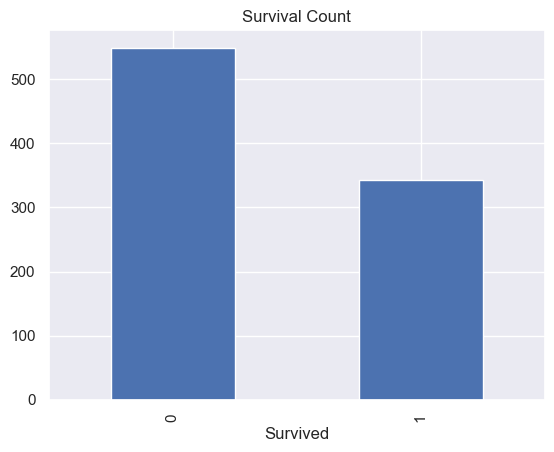

In [11]:
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')
plt.show()

### The dataset is imbalanced — more passengers did not survive (label 0) compared to those who did (label 1). Only about 38% survived.

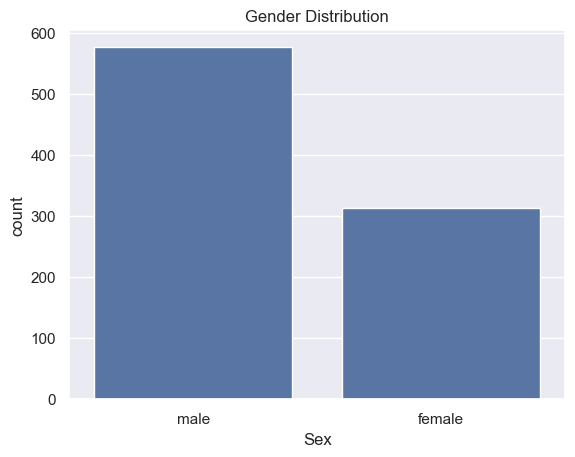

In [16]:
# Sex Distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

### There were significantly more males than females onboard. Roughly 65% of passengers were male.

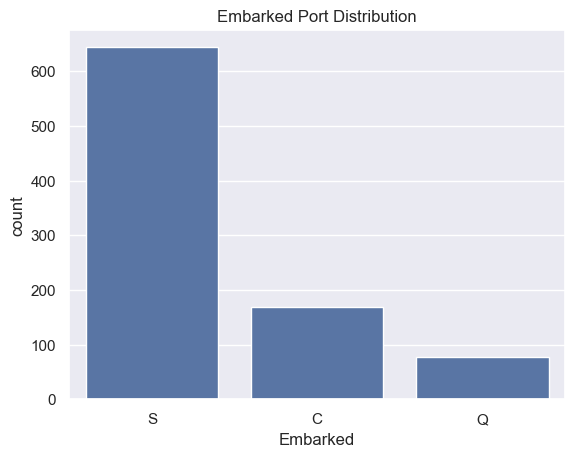

In [18]:
# Embarked
sns.countplot(x='Embarked', data=df)
plt.title("Embarked Port Distribution")
plt.show()

### Most passengers embarked from port S (Southampton), followed by C (Cherbourg) and Q (Queenstown).

##### b. Numerical Variables

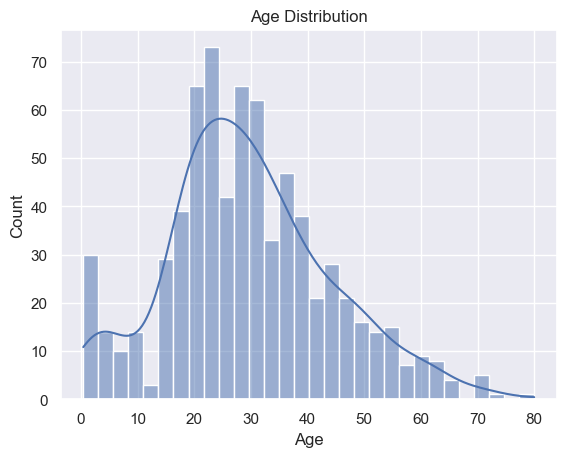

In [23]:
# Age Distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### The majority of passengers were between 20 and 40 years old. There is a long tail, showing a few passengers were above 60 years.

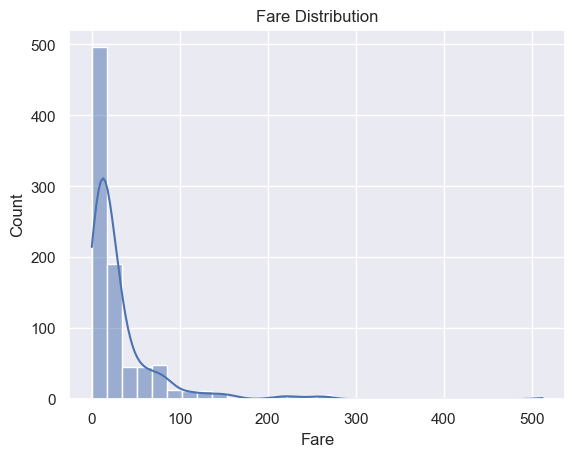

In [25]:
# Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

### The fare distribution is right-skewed — most passengers paid lower fares, but a few paid very high fares (luxury class).

####  Bivariate Analysis (Two Variables)

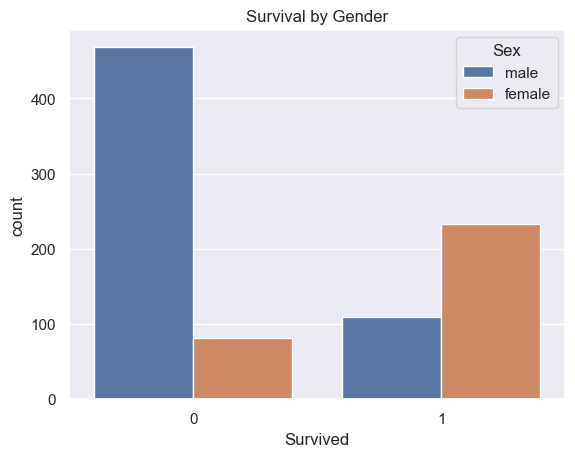

In [28]:
## Survival vs Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

### Female passengers had a much higher survival rate than males. This supports the “women and children first” evacuation principle.

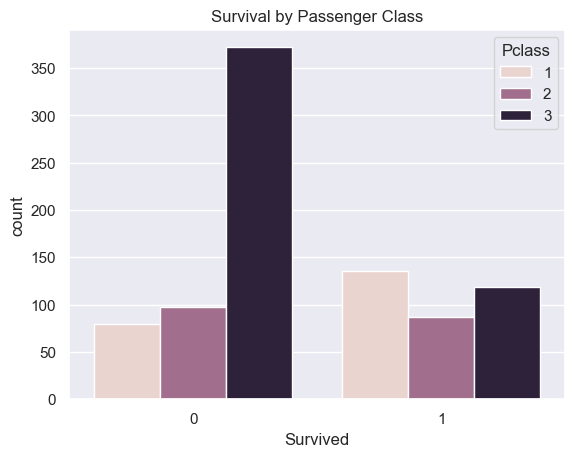

In [30]:
## Survival vs Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

### Passengers in 1st class had the highest survival rate, while those in 3rd class had the lowest. Wealthier passengers had a better chance of survival.

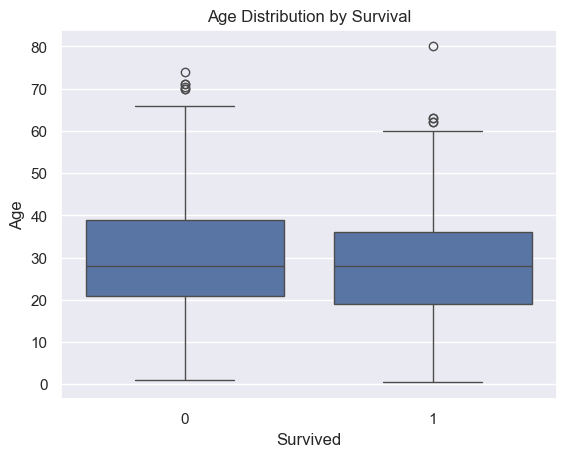

In [32]:
##  Boxplot Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

### Survivors were generally younger on average. A few children and young adults survived in higher numbers compared to older passengers.

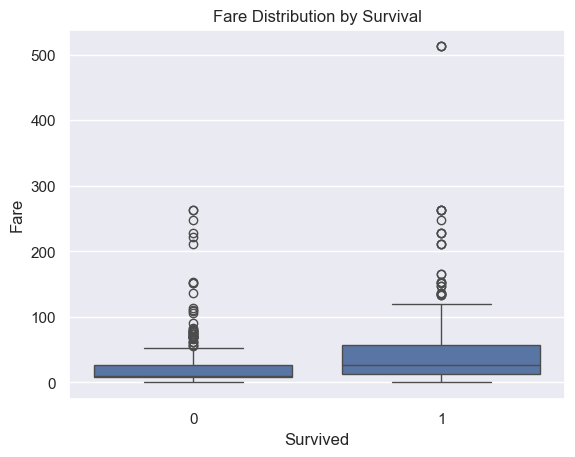

In [34]:
## Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

### Passengers who paid higher fares had a better chance of survival, indicating that first-class passengers had better access to lifeboats or early rescue.

#### Multivariate Analysis


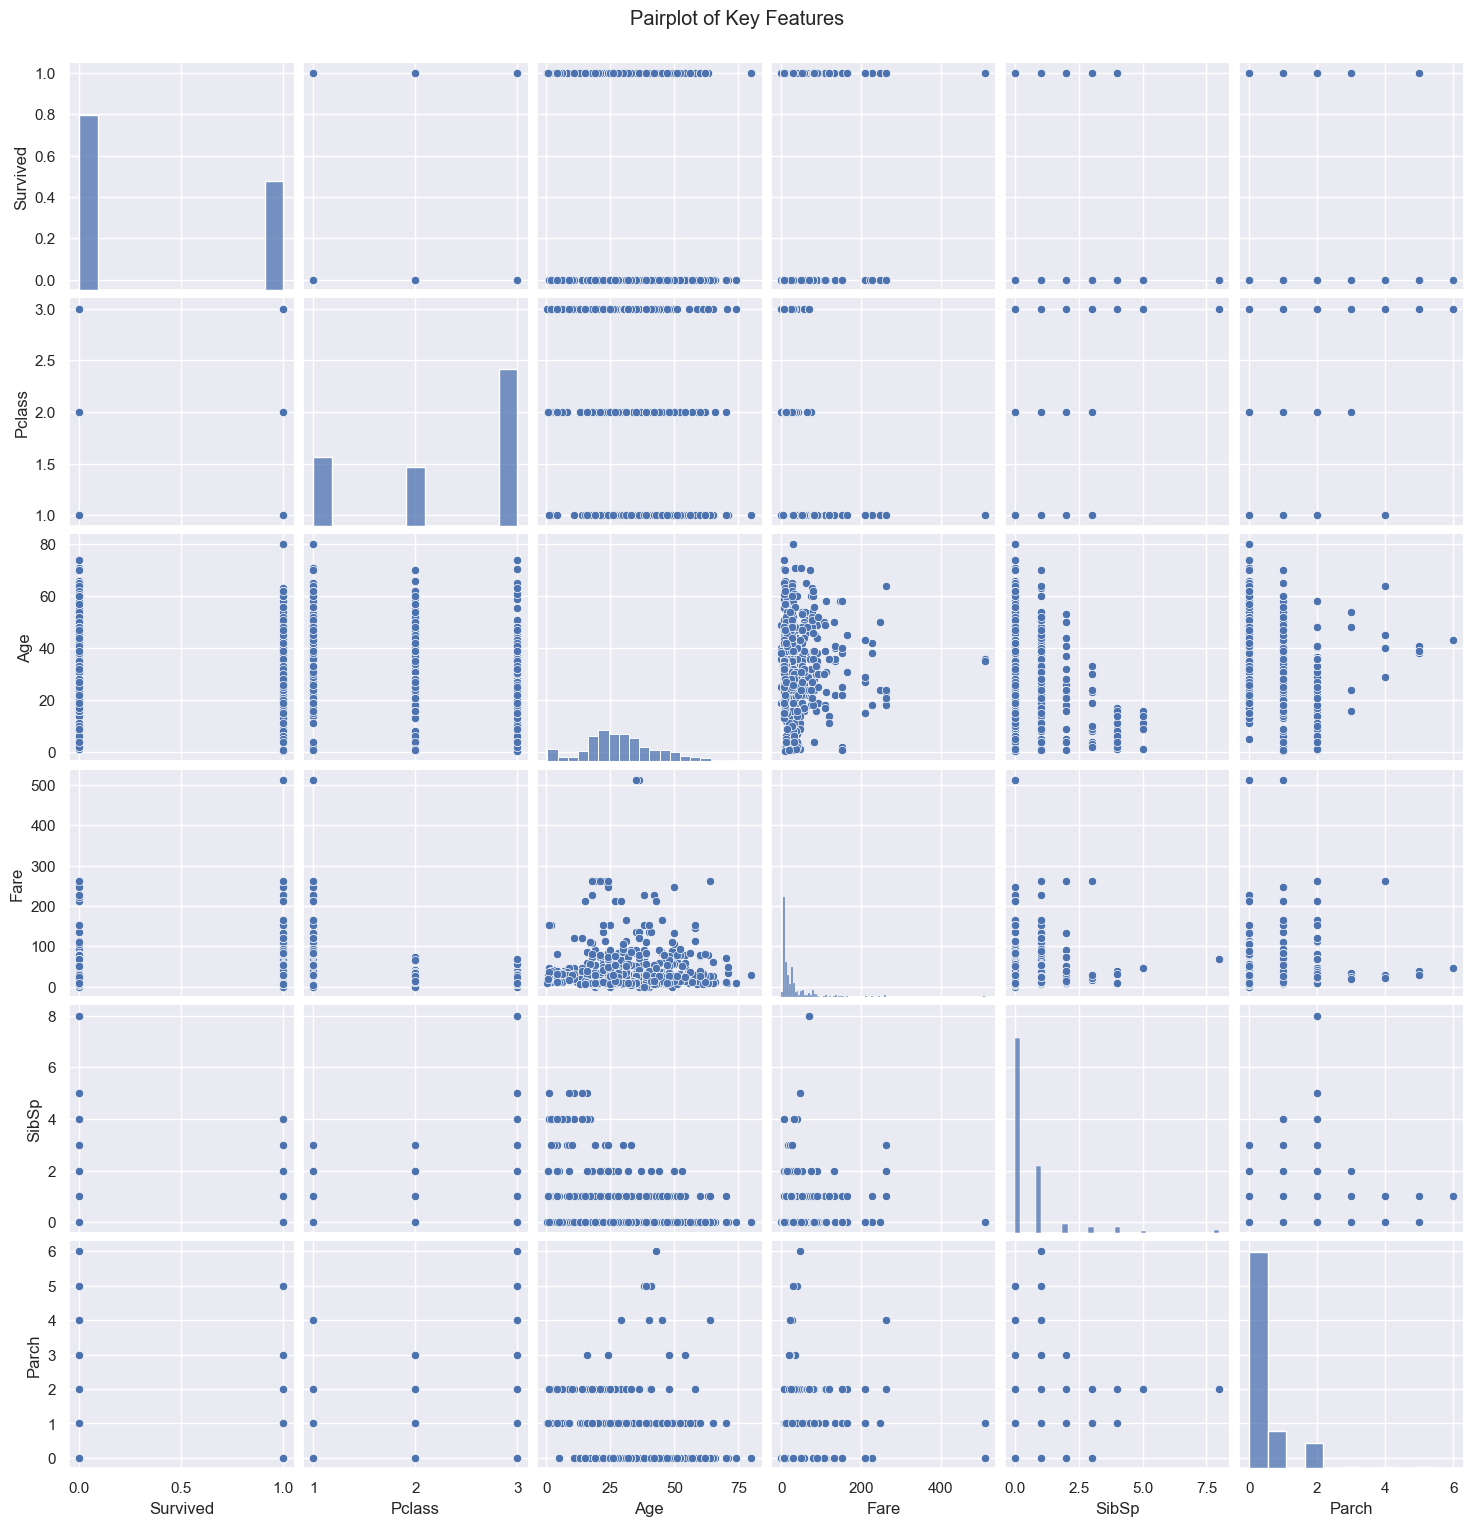

In [44]:
sns.pairplot(df[['Survived','Pclass','Age','Fare','SibSp', 'Parch']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

### Visual correlation among variables like Fare, Age, and Pclass shows that higher fare and lower Pclass (i.e., 1st class) align with survival. No strong linear trends, but visible clusters of survivors.

#### Correlation Heatmap

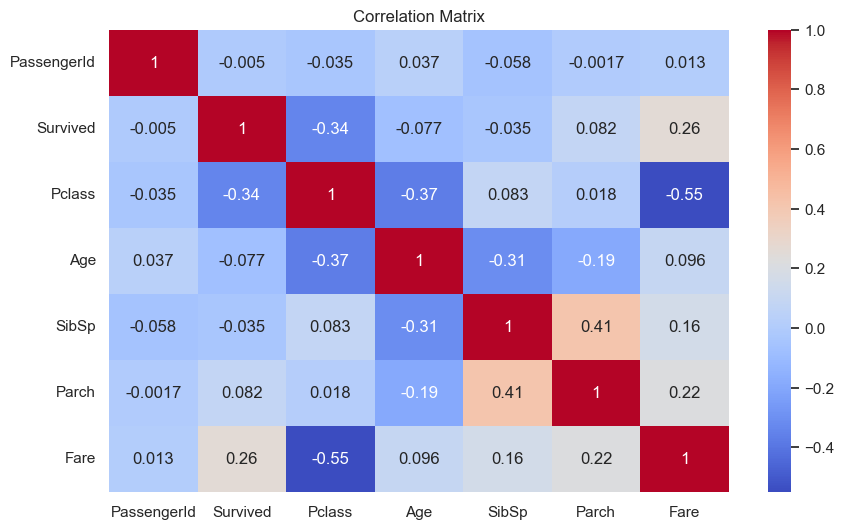

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Pclass is negatively correlated with survival (lower class → lower survival).
### Fare has a positive correlation with survival.
### SibSp and Parch show weak positive correlations — having family onboard may have slightly helped survival chances.

#### Handling Missing Data

In [62]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [68]:
# 1. Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop Cabin column (if it exists)
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Summary of EDA Findings

#### - Survival Rate: ~38% passengers survived.
#### - Females had higher survival rate than males.
#### - Higher-class passengers (Pclass 1) had better survival.
#### - Younger passengers had slightly higher survival.
#### - Fares varied a lot, and higher fare was linked to survival.
#### - Cabin had too many missing values, dropped.